> 필사 하기

데이터 시각화의 라이브러리로서, seaborn은 당신이 데이터를 제공할 것을 요구한다. 이 장에서는 그 일을 완수하는 다양한 방법을 설명한다.그 일을 완수하는 다양한 방법을 설명한다. Seaborn은 여러 가지 데이터 세트 형식을 징원하며 대부분의 함수는 pandas 또는 numpy 라이브러리의 개체와 목록 및 사전과 같은 내장 파이썬 유형으로 표현된 데이터를 허용한다. 이러한 다양한 옵션과 관련된 사용 패턴을 이해하면 거의 모든 데이터 세트에 대한 유용한 시각화를 빠르게 만드는데 도움 될 것이다.

# Long-form vs. wide-form data
Seaborn의ㅢ대부분의 플로팅 함수는 데이터 벡터를 지향한다. Y에 대해 x를 플로팅 할 때, 각 변수는 벡터여야 한다. Seaborn은 표 방식으로 구성된 하나 이상의 벡터가 있는 데이터 세트를 받아들인다. `긴 형태`와 `넓은 형태` 데이터 테이블 사이에는 근본적인 차이가 있으며, Seaborn은 각각 다르게 취급한다.

## Long-form data
긴 형식의 데이터 테이블은
- Each variable is a column
- Each obserrvation is a row

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


긴 형식의 데이터인 경우. 테이블의 열은 변수 중에 하나에 명시적으로 할당하여 플롯에서 역할이 부여된다.

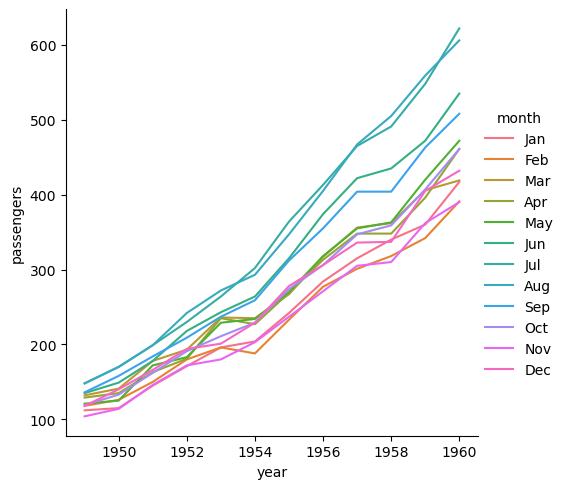

In [3]:
sns.relplot(data = flights, x = 'year', y = 'passengers', hue= 'month', kind = 'line');

long-form 데이터의 장점은 플롯의 명시적인 특성에 잘어울린다는 것이다. 변수와 관측치가 명확하게 정의될 수 있는 한, 임의의 복잡성의 데이터 세트를 수용할 수 있다. 하지만 이 형식은 익숙해지는데 시간이 좀 걸린다. 왜냐면 그것은 종종 맞지 않는 데이터 모델이기 때문이다.

## Wide-form data
간단한 데이터 집합의 경우, 열과 행에 다양한 변수의 수준이 포함되어 있는 스프레드 시트에서 볼 수 있는 방식으로 데이터를 생각하는 것이 더 직관적인 경우가 많다. 예를들어 항공편 데이터 집합을 `pivot`하여 각 열이 수 년에 걸친 월별 시계열을 갖도록 함으로써 wide-form 조직으로 변환할 수 있다.

In [4]:
flights_wide = flights.pivot(index = 'year', columns = 'month', 
                             values = 'passengers')
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


여기에는 동일한 세 개의 변수가 있지만 구성이 다르게 되어 있다. 이 데이터 집합의 변수는 명명된 필드가 아니라 테이블의 차원에 연결된다. 각 관측 값은 테이블의 셀에 있는 값과 행 및 열 인덱스에 대한 해당 셀의 좌표 모두로 정의된다.

long-form data에서는 데이터의 집합 변수에 이름으로 액세스할 수 있지만, wide-form data는 그렇지 않다. 그럼에도 불구하고 테이블의 차원과 데이터 집합의 변수 간에 명확한 연관성이 있기 때문에 seaborn은 플롯에서 해당 변수에 역할을 할당할 수 있다

> seaborn은 데이터에 대한 인수가 `x`나 `y`가 지정되지 않는 경우 wide-form으로 처리한다.

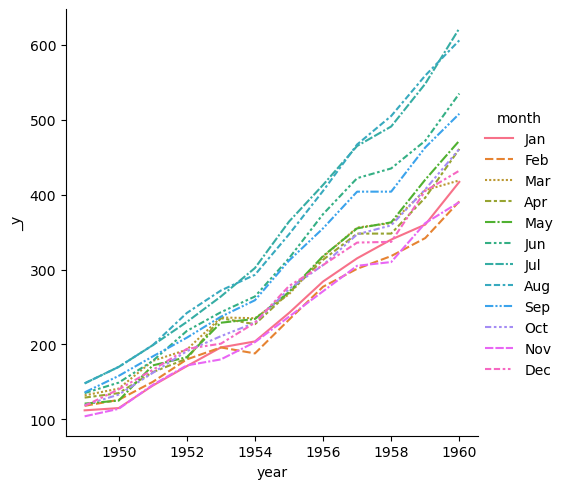

In [5]:
sns.relplot(data = flights_wide, kind = 'line')

이 플롯은 이전 플롯과 매우 유사하다. seaborn은 데이터 프레임의 인덱스를 x에, 데이터 프레임의 값을 y에 할당하고 각 월에 대해 별도의 선을 그렸다. 그러나 두 플롯 사이에는 눈에 띄는 차이가 있다. 데이터 집합을 long-form에서 wide-form으로 변환하는 `pivot`작업을 거쳤을 때 값의 의미에 대한 정보가 손실 되었습니다. 그 결과 Y축 레이블이 없다.(`relplot()`이 열 변수를 색조 및 스타일 시맨틱에 매핑하여 플롯에 더 쉽게 액세스할 수 있도록 했기 때문에 여기에도 dash가 있다. long-form의 경우에는 그렇지 않았지만 스타일을  month로 설정하면 가능하다.

지금까지 wide-form data를 사용하면서 타이핑을 훨씬 적게 하고 거의 동일한 플롯을 만들었다. 이것이 더 쉬워보이지만 long-form data의 큰 장점은 올바른 형식이 데이터를 확보하면 더 이상 데이터의 구조에 대해 생각할 필요가 없다는 것입니다. 그 안에 포함된 변수만 생각하면서 플롯을 디자인할 수 있습니다. 예를 들어, 연도별 월별 시계열을 나타내는 선을 그리려면 변수를 다시 할당하기만 하면 된다.

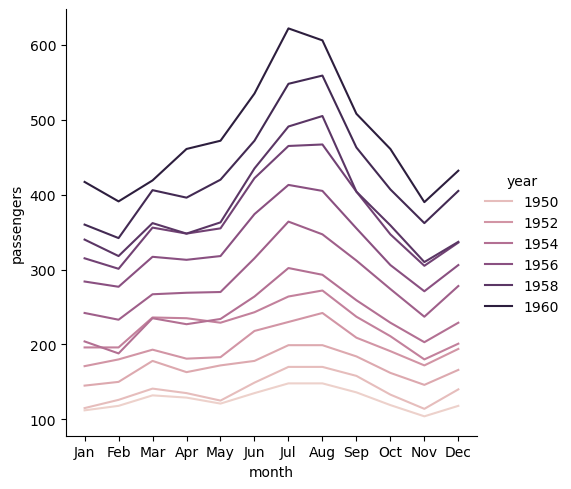

In [6]:
sns.relplot(data = flights, x = 'month', y = 'passengers', 
            hue = 'year', kind = 'line')

wide-form data 집합으로 동일한 remapping을 수행하려면 테이블을 `transpose()` 해줘야 한다.

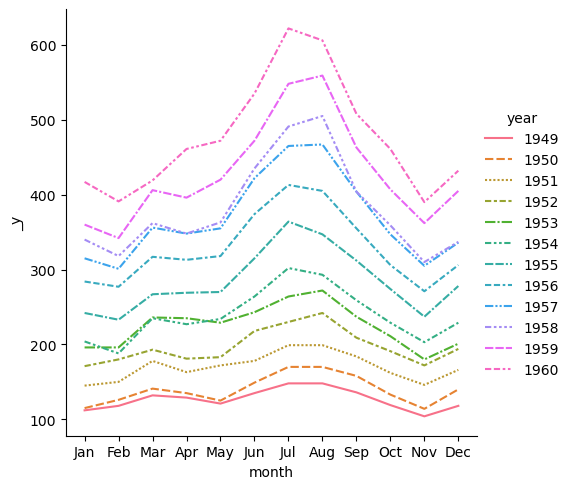

In [7]:
sns.relplot(data = flights_wide.transpose(), kind = 'line')

(이 예에서 또 다른 문제점을 보여주는데, 현재 seaborn은 wide-form data 집합의 열 변수를 데이터 유형에 관계없이 범주형으로 간주하는 반면, long-form 변수는 숫자이므로 수량 색상표와 범례가 할당된다는 점입니다. 이는 향후 변경될 수 있다.)

명시적인 변수 할당이 없다는 것은 각 플롯 유형이 wide-form data 데이터의 차원과 플롯의 역할간에 고정된 매핑을 정의해야 한다는 의미이기도 한다. 이러한 자연스러운 매핑은 플롯 유형에 따라 다를 수 있으므로 wide-form data를 사용할 때 자연스러운 매핑은 플롯 유형에 따라 다를 수 있으므로 wide-form data를 사용할 때 결과를 예측하기 어렵다. 예를들어 범주형 플롯은 테이블의 열 차원을 x로 지정한 다음 인덱스를 무시하고 행에 걸쳐 집계한다.

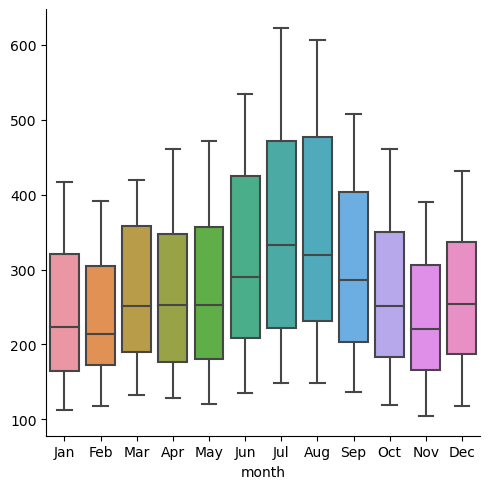

In [8]:
sns.catplot(data = flights_wide, kind = 'box')

pandas를 사용하여 wide-form data를 표현할 때는 변수가 몇 개(3개 이하)로만 제한된다. 이는 seaborn이 multi-index 정보를 사용하지 않기 때문인데, 이는 pandas가 추가 변수를 표 형식으로 표현하는 방식이다. xarray 프로젝트는 레이블이 지정된 N차원 배열 객체를 제공하며, 이는 wide-form data를 더 높은 차원으로 일반화한 것으로 간주할 수 있다. 현재 seaborn은 xarray의 객체를 직접 지원하지는 않지만, to_pandas 메서드를 사용하여 긴 형식의 pandas.DataFrame으로 변환한 다음 다른 긴 형식의 데이터 세트와 마찬가지로 seaborn에서 플로팅할 수 있다.